In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt


In [28]:
df = pd.read_csv("/content/wines_SPA_standardized.csv")


In [29]:
df.head()

,winery,wine,year,rating,num_reviews,country,region,price,type,body,acidity
0,Pago de Carraovejas,El Anejon,2016,3.517571,0.802642,Espana,Ribera del Duero,0.841107,Ribera Del Duero Red,1.397288,0.0
1,Pago de Carraovejas,Cuesta de Las Liebres,2015,3.517571,0.496045,Espana,Ribera del Duero,2.099802,Ribera Del Duero Red,1.397288,0.0
2,Bodegas El Nido,El Nido,2018,3.517571,-0.083499,Espana,Jumilla,2.707130,Red,-0.398454,0.0
3,La Rioja Alta,Gran Reserva 890,1985,3.517571,-0.797646,Espana,Rioja,3.113687,Rioja Red,-0.398454,0.0
4,Pago de Carraovejas,Cuesta de Las Liebres,2014,2.683803,1.666348,Espana,Ribera del Duero,1.006719,Ribera Del Duero Red,1.397288,0.0


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1398 entries, 0 to 1397
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   winery       1398 non-null   object 
 1   wine         1398 non-null   object 
 2   year         1398 non-null   object 
 3   rating       1398 non-null   float64
 4   num_reviews  1398 non-null   float64
 5   country      1398 non-null   object 
 6   region       1398 non-null   object 
 7   price        1398 non-null   float64
 8   type         1398 non-null   object 
 9   body         1398 non-null   float64
 10  acidity      1398 non-null   float64
dtypes: float64(5), object(6)
memory usage: 120.3+ KB


In [23]:
# it is a preprocessed dataset

In [31]:
df.describe()

,rating,num_reviews,price,body,acidity
count,1.398000e+03,1.398000e+03,1.398000e+03,1.398000e+03,1398.0
mean,-8.945316e-16,3.049540e-17,4.066053e-17,8.030454e-16,0.0
std,1.000358e+00,1.000358e+00,1.000358e+00,1.000358e+00,0.0
min,-1.485037e+00,-8.013848e-01,-1.214095e+00,-2.194196e+00,0.0
25%,-6.512694e-01,-7.069753e-01,-7.095751e-01,-3.984543e-01,0.0
50%,1.824986e-01,-4.723537e-01,-3.174575e-01,-3.984543e-01,0.0
75%,1.824986e-01,4.764149e-01,3.424653e-01,1.397288e+00,0.0
max,3.517571e+00,3.397501e+00,3.538752e+00,1.397288e+00,0.0


In [32]:

categorical_columns = ["winery", "wine", "year", "country", "region", "type"]


In [33]:
df = pd.get_dummies(df, columns=categorical_columns, drop_first=True)


In [35]:
from sklearn.preprocessing import StandardScaler

In [42]:
X = df.drop(columns=["rating"])
y = df["rating"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# SCALING TO IMPROVE PERFORMANCE
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [37]:
encoder = LabelEncoder()
y = encoder.fit_transform(y)
# TO CONVERT CATEGORICAL FEATURES TO NUMBERS

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [38]:
# STUDIED THAT NEURAL NETWORKS WORKWELL ON NUMPY ARRAYS RATHER THAN ON PANDAS DATAFRAMES
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)


In [39]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam


In [52]:
# BUILDING THE MODEL
#DEFINITION
model = Sequential([
    Dense(64, activation="relu", input_shape=(X_train.shape[1],)),  # TWO HIDDEN LAYERS
    Dropout(0.3),  #TO PREVENT OVERFITTING
    Dense(32, activation="relu"),
    Dropout(0.2),
    Dense(1,activation="linear")  #LINEAR ACTIVATION FUNCTION FOR REGRESSION
])

#COMPILATION
model.compile(optimizer=Adam(learning_rate=0.001), loss="mse", metrics=["mae"])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [53]:
#TRAINING AND STORING THE WEIGHTS IN HISTORY VARIABLE
history = model.fit(X_train, y_train.astype(float), epochs=100, batch_size=32, validation_data=(X_test, y_test.astype(float)))

Epoch 1/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 1.8004 - mae: 1.0625 - val_loss: 0.9113 - val_mae: 0.7768
Epoch 2/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.0243 - mae: 0.7856 - val_loss: 0.8308 - val_mae: 0.7423
Epoch 3/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.8759 - mae: 0.7321 - val_loss: 0.7938 - val_mae: 0.7230
Epoch 4/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.7538 - mae: 0.6856 - val_loss: 0.7697 - val_mae: 0.7149
Epoch 5/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.5890 - mae: 0.6064 - val_loss: 0.7171 - val_mae: 0.6857
Epoch 6/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.6305 - mae: 0.6280 - val_loss: 0.6962 - val_mae: 0.6723
Epoch 7/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.5209 - mae: 0.5498 - val_loss: 0.6942 - val_mae: 0.6647
Epoch 8/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.4470 - mae: 0.5213 - val_loss: 0.7124 - val_mae: 0.6717
Epoch 9/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.40

In [48]:
print(y_test.shape)


(280, 1)


In [54]:
import numpy as np
y_test = np.array(y_test)


In [44]:
y_train = y_train.values.reshape(-1, 1)
y_test = y_test.values.reshape(-1, 1)


In [55]:
y_train = y_train.astype("float32")
y_test = y_test.astype("float32")


In [56]:
# EVALUATING THE MODEL PERFORMANCE
loss, mae = model.evaluate(X_test, y_test)
print(f"Mean Absolute Error: {mae}")


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.8285 - mae: 0.7395 
Mean Absolute Error: 0.7237609624862671


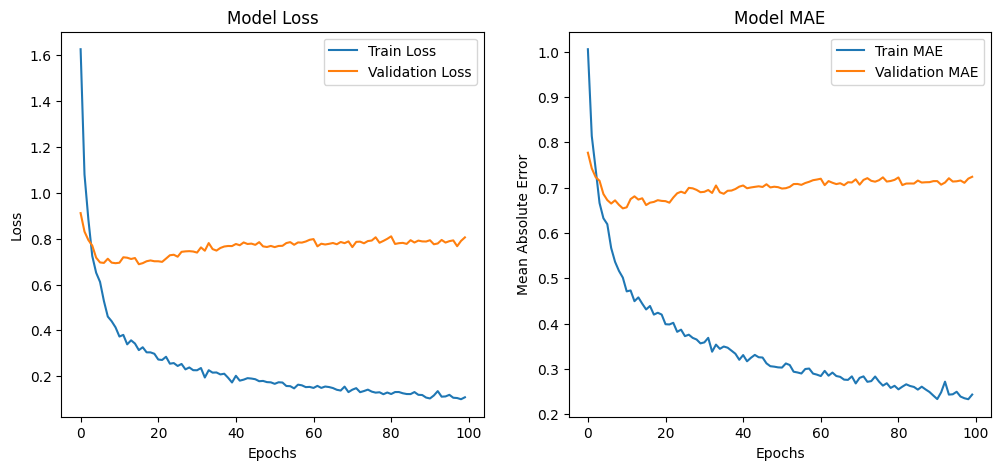

In [57]:
# STORING IN HISTORY WAS TO VISUALISE AND COMPARE TRAIN LOSS, VAL LOSS AND TRAIN ACCURACY AND VAL ACCURACY
plt.figure(figsize=(12, 5))

# Plot Loss
plt.subplot(1, 2, 1)
plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Model Loss")
plt.legend()

# Plot MAE
plt.subplot(1, 2, 2)
plt.plot(history.history["mae"], label="Train MAE")
plt.plot(history.history["val_mae"], label="Validation MAE")
plt.xlabel("Epochs")
plt.ylabel("Mean Absolute Error")
plt.title("Model MAE")
plt.legend()

plt.show()


In [60]:
# THIS INDICATE THAT THERE MAY BE A PROBLEM OF OVERFITTING, WE CAN AVOID IT BY USING REGULARIZATION TECHNIQUES

In [59]:
y_pred = model.predict(X_test)

# COMPARE PREDICTIONS
comparison = pd.DataFrame({"Actual": y_test.flatten(), "Predicted": y_pred.flatten()})
print(comparison.head())


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step 
     Actual  Predicted
0  1.850035   1.837876
1  0.182499   1.085644
2  0.182499  -0.508709
3  0.182499  -0.370492
4 -0.651269   0.028989
